In [4]:
##### IMPORTATION DES PRÉDICTIONS FOMONET #####
import pickle
with open('ENSG00000012048_orfs.pkl', 'rb') as f: # Ouverture du fichier contenant les prédictions de FOMOnet sous forme de dictionnaire
    orf = pickle.load(f)
print(orf) # Impression du dictionnaire des prédictions

{'ENSG00000012048_ENST00000497488_139745809': [(248, 4952)], 'ENSG00000012048_ENST00000497488_139745812': [(248, 4952)], 'ENSG00000012048_ENST00000497488_139745823': [(248, 4952)], 'ENSG00000012048_ENST00000497488_139745826': [(248, 4952)], 'ENSG00000012048_ENST00000497488_139741499': [(248, 4952)], 'ENSG00000012048_ENST00000497488_139740861': [(248, 4952)], 'ENSG00000012048_ENST00000497488_139740551': [(248, 4952)], 'ENSG00000012048_ENST00000497488_139743542': [(248, 4952)], 'ENSG00000012048_ENST00000497488_139745856': [(248, 4952)], 'ENSG00000012048_ENST00000497488_139745861': [(248, 4952)], 'ENSG00000012048_ENST00000497488_139745866': [(248, 4952)], 'ENSG00000012048_ENST00000497488_139746775': [(248, 4952)], 'ENSG00000012048_ENST00000497488_139741003': [(248, 4952)], 'ENSG00000012048_ENST00000497488_139740821': [(248, 4952)], 'ENSG00000012048_ENST00000497488_139741019': [(248, 4952)], 'ENSG00000012048_ENST00000497488_139741023': [(248, 4952)], 'ENSG00000012048_ENST00000497488_139746

In [5]:
##### FAIRE LE GENE_DIC ET LE CDS_DIC DU GÈNE D'INTÉRÊT #####

gene = 'ENSG00000012048'
import re # Importation du module pour les regular expression
gene_dic = {} # Création du dictionnaire vierge
gene_dic[gene]= {} # Ajoute le nom du gène (identifiant ENSG) comme 1ere clé et un sous-dictionnaire comme valeur
data = 'Homo_sapiens.GRCh38.113.gtf'
with open(data, 'r') as file: # Ouverture du GTF en mode read()
    for line in file: # Itération sur chaque ligne du GTF

        # Séparation dans les lignes à l'aide des caractères '\t' et '"'
        colonne_tab = line.split('\t') 
        colonne_guillemet = line.split('"')
            
        if gene in line: # Conserve les lignes qui portent sur le gène d'intérêt dans le GTF

            if colonne_tab[2]== 'gene': # Retient la ligne sur le gène général
                brand = colonne_tab[6] # Stock dans une variable la nature du brin +/-
                gene_name = colonne_guillemet[5] # Stock dans une variable le nom commun du gène. Ex. BRCA1

            if colonne_tab[2]== 'transcript': # Retient les lignes sur les transcrits
                transcrit_nom = colonne_guillemet[5] # Stock le nom du transcrit ENST dans une variable
                gene_dic[gene][transcrit_nom]= {} # Ajoute le nom des transcrits au 1er sous-dictionnaire (clé) et un sous-dictionnaire comme valeur

            if colonne_tab[2]== 'exon': # Retient les lignes d'exons
                transcrit_name_info = re.search(r'ENST[0123456789]{5,100}', line) # Recherche le nom du transcrit dans la ligne de l'exon
                transcrit_name = transcrit_name_info.group(0) # Stock le nom du transcrit ENST dans une variable
                exon_name_info = re.search(r'ENSE[0123456789]{5,100}', line) # Recherche le nom de l'exon dans la ligne de l'exon
                exon_name = exon_name_info.group(0) # Stock le nom de l'exon ENSE dans une variable
                petit = colonne_tab[3] # Position génomique la plus petite
                grand = colonne_tab[4] # Position génomique la plus grande

                for key in gene_dic[gene].keys(): # Itération sur chaque transcrit du gène
                    if key == transcrit_name: # La clé (transcrit) doit être le même que le nom du transcrit de la ligne
                        gene_dic[gene][transcrit_name][exon_name]= [] # Ajoute tous les exons appartenant au transcrit (clé) et une liste vide comme valeur

                for key in gene_dic[gene][transcrit_name].keys(): # Itération sur chaque exon présent dans un transcrit
                    if key == exon_name: # La clé (exon) doit être le même que le nom de l'exon de la ligne
                        gene_dic[gene][transcrit_name][exon_name].append(petit) # Ajoute la première position génomique dans la liste
                        gene_dic[gene][transcrit_name][exon_name].append(grand) # Ajoute la deuxième position génomique dans la liste

import re # Importation du module pour les regular expression
cds_dic = {} # Création du dictionnaire vierge
cds_dic[gene]= {} # Ajout du nom du gène comme 1ere clé avec un sous-dictionnaire comme valeur
data = 'Homo_sapiens.GRCh38.113.gtf'
with open(data,'r') as file: # Ouverture du GTF
    for line in file: # Itération sur chaque ligne du GTF
        # Séparation dans les lignes à l'aide des caractères '\t' et '"'
        colonne_tab = line.split('\t')
        colonne_guillemet = line.split('"')
        if len(colonne_tab) >= 3 and len(colonne_guillemet) >= 3: # Permet de retirer les premières lignes qui ne contiennent pas de données génomiques
            if gene in line: # Retient les lignes qui concerne le gène d'intérêt
                if colonne_tab[2]== 'transcript': # Retient les lignes de transcrit
                    transcrit = colonne_guillemet[5] # Stock le nom du transcrit ENST
                    cds_dic[gene][transcrit]= {} # Ajoute le nom du transcrit dans le 1er sous-dictionnaire et un sous-dictionnaire comme valeur
                if colonne_tab[2]== 'CDS': # Retient les lignes de CDS
                    transcrit_name_info = re.search(r'ENST[0123456789]{5,100}', line) # Recherche le nom du transcrit dans la ligne
                    transcrit_name = transcrit_name_info.group(0) # Stock le nom du transcrit dans une variable ENST
                    exon_number = colonne_guillemet[9] # Stock le numéro d'exon
                    petit = colonne_tab[3] # Position génomique la plus petite
                    grand = colonne_tab[4] # Position génomique la plus grande
                    for key in cds_dic[gene].keys(): # Itération sur chaque transcrit du gène
                        if key == transcrit_name: # La clé (transcrit) doit être égal au nom du transcrit dans la ligne
                            cds_dic[gene][transcrit_name][exon_number]= [] # Ajoute le numéro d'exon au 2e sous-dictionnaire et une liste comme valeur
                            cds_dic[gene][transcrit_name][exon_number].append(petit) # Ajoute la première position génomique dans la liste
                            cds_dic[gene][transcrit_name][exon_number].append(grand) # Ajoute la deuxième position génomique dans la liste

In [7]:
# Cette section de code sert à sortir la séquence ADNc du transcrit sans mutation et du transcrit avec une mutation.


##### CRÉATION DE LA FONCTION SEQUENCE_MUTE() #####
# Cette fonction dépend du transcrit et de la mutation_id et permet de sortir la séquence d'ADNc du transcrit muté.

def sequence_mute (transcrit, mutation_id): # Définir la fonction; elle dépend du transcrit et de la mutation_id
    header_of_transcrit = '' # Création d'une chaine qui contiendra le header recherché
    fichier = f"/mnt/c/Documents/Documents/Cosmics_transcript_mutated/{gene}_files/{gene}_all_transcripts_with_mutation.fasta" # Ouverture du fichier qui renferme toutes les séquences des transcrits mutés
    with open(fichier, 'r') as file: # Ouverture du fasta qui contient la séquence ADNc de tous les transcrits mutés du gènes d'intérêt
        for line in file: # Itération sur chaque ligne du fichier
            if gene in line and transcrit in line and mutation_id in line: # Retient la ligne avec le nom du gène, le nom du transcrit et la mutation id
                header_of_transcrit = line.strip() # Cette ligne devient le header_of_transcrit, car elle contient le gène et le transcrit recherché
                break # Quand le header est trouvé, on sort de la boucle

    if header_of_transcrit: # Si un header a été trouvé
        sequence = "" # Création d'une chaine qui contiendra la séquence ADNc du transcrit muté
        header_trouve = False

        with open(fichier, 'r') as file: # Ouverture du fichier fasta qui contient les séquences d'ADNc
            for line in file: # Itération sur chaque ligne du fichier
                line = line.strip()
                if line.startswith(">"): # Retient les lignes commençant par '>', donc les headers
                    if header_trouve:
                        break

                    if line == header_of_transcrit: # La ligne correspond au header recherché
                        header_trouve = True

                elif header_trouve:
                    sequence += line

        if sequence: # Si une séquence a été extraite
            return sequence
            
        else: # Si aucune n'a été trouvé
            return ("Séquence non trouvée.")
            
    else: # Si aucun header n'a été trouvé
        return (f"Le header {header_of_transcrit} n'a pas été trouvé.")

##### CRÉATION DE LA FONCTION SEQUENCE_CDNA() #####
# Cette fonction dépend seulement du transcrit et elle sort la séquence d'ADNc du transcrit sans mutation.

def sequence_cDNA (transcrit): # Définir la fonction; elle dépend seulement du transcrit
    header_of_transcrit = '' # Création d'une chaine qui contiendra le header recherché

    with open('Homo_sapiens.GRCh38.cdna.all.fa', 'r') as file: # Ouverture du fasta qui contient la séquence ADNc de tous les transcrits des gènes Homo sapiens
        for line in file: # Itération sur chaque ligne du fichier
            if gene in line and transcrit in line: # Retient la ligne avec le nom du gène et le nom du transcrit
                header_of_transcrit = line.strip() # Cette ligne devient le header_of_transcrit, car elle contient le gène et le transcrit recherché
                break # Quand le header est trouvé, on sort de la boucle

    if header_of_transcrit: # Si un header a été trouvé
        sequence = "" # Création d'une chaine qui contiendra la séquence ADNc 
        header_trouve = False

        with open('Homo_sapiens.GRCh38.cdna.all.fa', 'r') as file: # Ouverture du fichier fasta qui contient les séquences d'ADNc
            for line in file: # Itération sur chaque ligne du fichier
                line = line.strip()
                if line.startswith(">"): # Retient les lignes commençant par '>', donc les headers
                    if header_trouve:
                        break

                    if line == header_of_transcrit: # La ligne correspond au header recherché
                        header_trouve = True

                elif header_trouve:
                    sequence += line

        if sequence: # Si une séquence a été extraite
            return sequence
            
        else: # Si aucune n'a été trouvé
            return ("Séquence non trouvée.")
            
    else: # Si aucun header n'a été trouvé
        return (f"Le header {header_of_transcrit} n'a pas été trouvé.")
    


##### CRÉATION DE LA FONCTION GET_POSITION_CHRONOLOGIQUE() #####
# Dans la fonction, la position chronologique retrouvée commence par 1. Pour qu'elle commence par 0, il faut alors faire -1.

def get_position_chronologique(position_chromosomique, transcrit): # Définir la fonction; elle dépend du transcrit et de la position chromosomique
    total = 0
    liste_position_fin_exon = [0] # Liste qui va contenir la position de fin de chaque exon en coordonnées chronologiques

    for exon in gene_dic[gene][transcrit]: # Itération sur chaque exon du transcrit
        longueur_exon = int(gene_dic[gene][transcrit][exon][1])-int(gene_dic[gene][transcrit][exon][0])+1 # Calcul de la longueur de l'exon en nombre de nucléotides
        total = total + int(longueur_exon) # Cette variable finit par contenir la longueur de l'exon et tous les exons précédents = position chronologique de fin pour chaque exon
        liste_position_fin_exon.append(total) # Ajoute les positions chronologiques de fin pour chaque exon

        # Conditions: la position chromosomique doit se retrouver obligatoire dans un exon du transcrit pour pouvoir être convertit en position chronologique
        if position_chromosomique >= int(gene_dic[gene][transcrit][exon][0]) and position_chromosomique <= int(gene_dic[gene][transcrit][exon][1]): 
            keys = list(gene_dic[gene][transcrit].keys()) # La variable keys renferme le nom de l'exon présentemment itéré, donc l'exon dans laquelle la position est incluse
            position_keys = keys.index(exon) # Je veux connaitre la position de l'exon dans le transcrit

            # Pour un gène sur le brin négatif
            if brand == '-':
            # Calcul de la conversion des coordonnées chromosomiques en coordonnées chronologiques dans un transcrit
                position_chronologique = int(liste_position_fin_exon[position_keys])+1+(int(gene_dic[gene][transcrit][exon][1])-position_chromosomique) 

            # Pour un gène sur le brin positif
            if brand == '+':
            # Calcul de la conversion des coordonnées chromosomiques en coordonnées chronologiques dans un transcrit
                position_chronologique = int(liste_position_fin_exon[position_keys])+1+(position_chromosomique-int(gene_dic[gene][transcrit][exon][0]))
    return position_chronologique # La fonction retourne la position chronologique dans le transcrit

In [ ]:
######### TESTINGGGG ##########
#{'139753297': [43093449, 43093454, 'ACTGTT', 'GCTGTC', '-']
sequence = (sequence_cDNA('ENST00000471181'))
#print(sequence_cDNA('ENST00000471181'))
print(get_position_chronologique(43093454,'ENST00000471181')) # Commence par 1
print(sequence[2308:])

2309
GACAGCGATACTTTCCCAGAGCTGAAGTTAACAAATGCACCTGGTTCTTTTACTAAGTGTTCAAATACCAGTGAACTTAAAGAATTTGTCAATCCTAGCCTTCCAAGAGAAGAAAAAGAAGAGAAACTAGAAACAGTTAAAGTGTCTAATAATGCTGAAGACCCCAAAGATCTCATGTTAAGTGGAGAAAGGGTTTTGCAAACTGAAAGATCTGTAGAGAGTAGCAGTATTTCATTGGTACCTGGTACTGATTATGGCACTCAGGAAAGTATCTCGTTACTGGAAGTTAGCACTCTAGGGAAGGCAAAAACAGAACCAAATAAATGTGTGAGTCAGTGTGCAGCATTTGAAAACCCCAAGGGACTAATTCATGGTTGTTCCAAAGATAATAGAAATGACACAGAAGGCTTTAAGTATCCATTGGGACATGAAGTTAACCACAGTCGGGAAACAAGCATAGAAATGGAAGAAAGTGAACTTGATGCTCAGTATTTGCAGAATACATTCAAGGTTTCAAAGCGCCAGTCATTTGCTCCGTTTTCAAATCCAGGAAATGCAGAAGAGGAATGTGCAACATTCTCTGCCCACTCTGGGTCCTTAAAGAAACAAAGTCCAAAAGTCACTTTTGAATGTGAACAAAAGGAAGAAAATCAAGGAAAGAATGAGTCTAATATCAAGCCTGTACAGACAGTTAATATCACTGCAGGCTTTCCTGTGGTTGGTCAGAAAGATAAGCCAGTTGATAATGCCAAATGTAGTATCAAAGGAGGCTCTAGGTTTTGTCTATCATCTCAGTTCAGAGGCAACGAAACTGGACTCATTACTCCAAATAAACATGGACTTTTACAAAACCCATATCGTATACCACCACTTTTTCCCATCAAGTCATTTGTTAAAACTAAATGTAAGAAAAATCTGCTAGAGGAAAACTTTGAGGAACATTCAATGTCACCTGAAAGAGAAATGGGAAATGAGAACATTCCAAGTACAGTGAG

In [8]:
##### CORRECTION DU DICTIONNAIRE DE DONNÉES PRÉDIT PAR FOMOnet POUR RETIRER LES CODONS STOP #####

# Les données FOMOnet commencent par le codon ATG et termine par TGA, TAA ou TAG. Le codon stop ne fait pas partie de la séquence codante du transcrit
# c'est pourquoi, il faut le retirer. Les positions données sont réglementaires à la notation de Python. C'est-à-dire que la position de début est
# incluse et la position de fin est excluse.

orf_sans_stop = {} # Création du dictionnaire vierge corrigé
for key in orf: # Itération sur chaque clé du dictionnaire orf
    #print(orf[key])
    orf_sans_stop[key]= [] # J'ajoute toutes les clés du dictionnaire orf dans orf_sans_stop et je met une liste vierge comme valeur
    for tuple in orf[key]:
        debut_cds = tuple[0]
        fin_cds = (tuple[1]-3) # Je fais -3 pour retirer le codon STOP
        tuple_corrige = (debut_cds, fin_cds)
        orf_sans_stop[key].append(tuple_corrige)
    #print(str(orf_sans_stop[key]) + ':' + str(orf[key]))
print(len(orf_sans_stop))
print(len(orf))

27957
27957


In [9]:
##### CORRECTION DES POSITIONS MUTÉES EN POSITION RÉFÉRENTIELLE SANS MUTATION #####

# Les prédictions données par FOMOnet sont par rapport aux positions des nucléotides dans les transcrit mutés. Il faut que je sois capable de
# comparer ces positions avec les positions données dans le transcrit référentiel.
# Je vais créer des dictionnaires pour chaque type de mutation. La clé du dictionnaire sera l'ID de la mutation et la valeur sera une liste, 
# renfermant des informations importantes sur la mutation comme position de début, position de fin, # nucléotide ajouté et # nucléotide enlevé.


gene = 'ENSG00000012048'


# TRAITEMENT DES INVERSIONS
inversion = {} # Création du dictionnaire vierge
fichier = f"/mnt/c/Documents/Documents/Cosmics_transcript_mutated/{gene}_files/{gene}_mutation_inversion.tsv"
try:
    with open(fichier, 'r') as file: # Ouverture du fichier qui contient toutes les mutations inversions du gène
        for line in file: # Itération sur chaque ligne du fichier
            colonne = line.split('\t') # Séparation avec les caractères tab
            mutation_id = colonne[8] # Stockage de l'identifiant de la mutation
            petit = int(colonne[15]) # Renferme la position génomique la plus petite
            grand = int(colonne[16]) # Renferme la position génomique la plus grande
            brand = colonne[17]
            delete = colonne[23] # Renferme la séquence de nucléotide enlevée
            ajoute = colonne[24] # Renferme la séquence de nucléotide ajoutée
            remove = len(delete) # Renferme la longueur de la séquence nucléotide enlevé
            add = len(ajoute) # Renferme la longueur de la séquence nucléotide ajouté
            inversion[mutation_id] = [] # Dans le dictionnaire, j'ajoute la mutation_id comme clé et une liste vide comme valeur
            inversion[mutation_id].extend([petit, grand, ajoute, delete, brand]) # Ajoute des infos dans la liste
except FileNotFoundError:
    pass
    

# TRAITEMENT DES SUBSTITUTIONS
substitution = {}
fichier = f"/mnt/c/Documents/Documents/Cosmics_transcript_mutated/{gene}_files/{gene}_mutation_substitution.tsv"
try:
    with open(fichier, 'r') as file: # Ouverture du fichier qui contient toutes les mutations substitutions du gène
        for line in file: # Itération sur chaque ligne du fichier
            colonne = line.split('\t') # Séparation avec les caractères tab
            mutation_id = colonne[8] # Stockage de l'identifiant de la mutation
            petit = int(colonne[15]) # Renferme la position génomique la plus petite
            grand = int(colonne[16]) # Renferme la position génomique la plus grande
            brand = colonne[17]
            delete = colonne[23] # Renferme la séquence de nucléotide enlevée
            ajoute = colonne[24] # Renferme la séquence de nucléotide ajoutée
            remove = len(delete) # Renferme la longueur de la séquence nucléotide enlevé
            add = len(ajoute) # Renferme la longueur de la séquence nucléotide ajouté
            substitution[mutation_id] = [] # Dans le dictionnaire, j'ajoute la mutation_id comme clé et une liste vide comme valeur
            substitution[mutation_id].extend([petit, grand, ajoute, delete, brand]) # Ajoute des infos dans la liste            
except FileNotFoundError:
    pass


# TRAITEMENT DES INSERTIONS
insertion = {} # Création du dictionnaire vierge
fichier = f"/mnt/c/Documents/Documents/Cosmics_transcript_mutated/{gene}_files/{gene}_mutation_insertion.tsv"
try:
    with open(fichier, 'r') as file: # Ouverture du fichier qui contient toutes les mutations insertions du gène
        for line in file: # Itération sur chaque ligne du fichier
            colonne = line.split('\t') # Séparation avec les caractères tab
            mutation_id = colonne[8] # Stockage de l'identifiant de la mutation
            petit = int(colonne[15]) # Renferme la position génomique la plus petite
            grand = int(colonne[16]) # Renferme la position génomique la plus grande
            brand = colonne[17]
            delete = colonne[23] # Renferme la séquence de nucléotide enlevée
            ajoute = colonne[24] # Renferme la séquence de nucléotide ajoutée
            remove = len(delete) # Renferme la longueur de la séquence nucléotide enlevé
            add = len(ajoute) # Renferme la longueur de la séquence nucléotide ajouté
            insertion[mutation_id] = [] # Dans le dictionnaire, j'ajoute la mutation_id comme clé et une liste vide comme valeur
            insertion[mutation_id].extend([petit, grand, ajoute, delete, brand]) # Ajoute des infos dans la liste   
except FileNotFoundError:
    pass


# TRAITEMENT DES DUPLICATIONS
duplication = {} # Création du dictionnaire vierge
fichier = f"/mnt/c/Documents/Documents/Cosmics_transcript_mutated/{gene}_files/{gene}_mutation_duplication.tsv"
try:
    with open(fichier, 'r') as file: # Ouverture du fichier qui contient toutes les mutations insertions du gène
        for line in file: # Itération sur chaque ligne du fichier
            colonne = line.split('\t') # Séparation avec les caractères tab
            mutation_id = colonne[8] # Stockage de l'identifiant de la mutation
            petit = int(colonne[15]) # Renferme la position génomique la plus petite
            grand = int(colonne[16]) # Renferme la position génomique la plus grande
            brand = colonne[17]
            delete = colonne[23] # Renferme la séquence de nucléotide enlevée
            ajoute = colonne[24] # Renferme la séquence de nucléotide ajoutée
            remove = len(delete) # Renferme la longueur de la séquence nucléotide enlevé
            add = len(ajoute) # Renferme la longueur de la séquence nucléotide ajouté
            duplication[mutation_id] = [] # Dans le dictionnaire, j'ajoute la mutation_id comme clé et une liste vide comme valeur
            duplication[mutation_id].extend([petit, grand, ajoute, delete, brand]) # Ajoute des infos dans la liste   
except FileNotFoundError:
    pass


# TRAITEMENT DES DELETIONS
deletion = {} # Création du dictionnaire vierge
fichier = f"/mnt/c/Documents/Documents/Cosmics_transcript_mutated/{gene}_files/{gene}_mutation_deletion.tsv"
try:
    with open(fichier, 'r') as file: # Ouverture du fichier qui contient toutes les mutations deletions du gène
        for line in file: # Itération sur chaque ligne du fichier
            colonne = line.split('\t') # Séparation avec les caractères tab
            mutation_id = colonne[8] # Stockage de l'identifiant de la mutation
            petit = int(colonne[15]) # Renferme la position génomique la plus petite
            grand = int(colonne[16]) # Renferme la position génomique la plus grande
            brand = colonne[17]
            delete = colonne[23] # Renferme la séquence de nucléotide enlevée
            ajoute = colonne[24] # Renferme la séquence de nucléotide ajoutée
            remove = len(delete) # Renferme la longueur de la séquence nucléotide enlevé
            add = len(ajoute) # Renferme la longueur de la séquence nucléotide ajouté
            deletion[mutation_id] = [] # Dans le dictionnaire, j'ajoute la mutation_id comme clé et une liste vide comme valeur
            deletion[mutation_id].extend([petit, grand, ajoute, delete, brand]) # Ajoute des infos dans la liste   
except FileNotFoundError:
    pass


# TRAITEMENT DES DELINS
delins = {} # Création du dictionnaire vierge
fichier = f"/mnt/c/Documents/Documents/Cosmics_transcript_mutated/{gene}_files/{gene}_mutation_del_ins.tsv"
try:
    with open(fichier, 'r') as file: # Ouverture du fichier qui contient toutes les mutations delins du gène
        for line in file: # Itération sur chaque ligne du fichier
            colonne = line.split('\t') # Séparation avec les caractères tab
            mutation_id = colonne[8] # Stockage de l'identifiant de la mutation
            petit = int(colonne[15]) # Renferme la position génomique la plus petite
            grand = int(colonne[16]) # Renferme la position génomique la plus grande
            brand = colonne[17]
            delete = colonne[23] # Renferme la séquence de nucléotide enlevée
            ajoute = colonne[24] # Renferme la séquence de nucléotide ajoutée
            remove = len(delete) # Renferme la longueur de la séquence nucléotide enlevé
            add = len(ajoute) # Renferme la longueur de la séquence nucléotide ajouté
            delins[mutation_id] = [] # Dans le dictionnaire, j'ajoute la mutation_id comme clé et une liste vide comme valeur
            delins[mutation_id].extend([petit, grand, ajoute, delete, brand]) # Ajoute des infos dans la liste   
except FileNotFoundError:
    pass


orf_corrige = {} # Création du dictionnaire vierge
for transcrit in gene_dic[gene]: # Itération sur chaque transcrit du gène
    for key in orf_sans_stop: # Itération sur chaque clé présent dans le dictionnaire
        if transcrit in key and key != f'{gene}_{transcrit}': # Le transcrit doit se retrouver dans la clé et doit être muté
            info = key.split('_') # Séparation avec les caractères _
            mutation_id = info[2] # Stockage de l'identifiant de la mutation


            # TRAITEMENT DES SUBSTITUTIONS
            if mutation_id in substitution:
                orf_corrige[key] = [] # Ajoute la clé au dictionnaire
                for tuple in orf_sans_stop[key]: # Itération sur chaque tuple présent pour la mutation
                    orf_corrige[key].append(tuple) # J'ajoute chaque tuple sans modification dans la liste


            # TRAITEMENT DES INVERSIONS
            elif mutation_id in inversion:
                orf_corrige[key] = [] # Ajoute la clé au dictionnaire
                for tuple in orf_sans_stop[key]: # Itération sur chaque tuple présent pour la mutation
                    orf_corrige[key].append(tuple) # J'ajoute chaque tuple sans modification dans la liste


            # TRAITEMENT DES INSERTIONS
            elif mutation_id in insertion:
                ajoute = int(len(insertion[mutation_id][2])) # Le nombre de nucléotide ajouté
                petit = int(insertion[mutation_id][0]) # Petite position génomique de la mutation
                grand = int(insertion[mutation_id][1]) # Grande position génomique de la mutation
                petit_chrono = (get_position_chronologique(petit, transcrit))-1 # Conversion génomique -> chronologique commençant par 0
                grand_chrono = (get_position_chronologique(grand, transcrit))-1 # Commence par 0
                position_chrono = [petit_chrono, grand_chrono] # Ajoute les deux positions chronologique dans une liste
                smallest = min(position_chrono) # Sort la plus petite position chronologique = début de la mutation
                biggest = max(position_chrono) # Sort la plus grande position chronologique = fin de la mutation
                orf_corrige[key] = [] # Ajoute la clé comme clé dans le dictionnaire avec une liste vierge
                for tuple in orf_sans_stop[key]: # Itération sur chaque tuple pour la mutation
                    debut_cds = tuple[0] # Position début du cds prédit
                    fin_cds = (int(tuple[1])-1) # Position fin du cds prédit, -1 pour vraiment aller chercher la vraie position et pas la position+1
                    # CONVERSION DE CES POSITIONS

                    # Si la position est avant l'insertion = PAS DE CHANGEMENT
                    if debut_cds <= smallest:
                        debut_cds_corrige = debut_cds
                    # Si la position se trouve dans la mutation = ON NE PEUT PAS Y ASSOCIÉ UNE POSITION DANS LE TRANSCRIT RÉFÉRENTIEL
                    elif smallest < debut_cds <= (smallest + ajoute):
                        reste = debut_cds-smallest
                        debut_cds_corrige = str(smallest) + '+' + str(reste)
                    # Si la position est après l'insertion
                    else:
                        if debut_cds > (smallest + ajoute):
                            debut_cds_corrige = (debut_cds-ajoute)

                    # Si la position est avant l'insertion = PAS DE CHANGEMENT
                    if fin_cds <= smallest:
                        fin_cds_corrige = fin_cds+1
                    # Si la position se trouve dans la mutation = ON NE PEUT PAS Y ASSOCIÉ UNE POSITION DANS LE TRANSCRIT RÉFÉRENTIEL
                    elif smallest < fin_cds <= (smallest + ajoute):
                        reste = fin_cds-smallest+1
                        fin_cds_corrige = str(smallest) + '+' + str(reste)
                    # Si la position est après l'insertion
                    else:
                        if fin_cds > (smallest + ajoute):
                            fin_cds_corrige = (fin_cds-ajoute+1)
                    tuple_corrige = (debut_cds_corrige, fin_cds_corrige) # Ajoute les positions corrigées dans un tuple
                    orf_corrige[key].append(tuple_corrige) # Ajoute le tuple dans la liste

            # TRAITEMENT DES DUPLICATIONS
            elif mutation_id in duplication:
                ajoute = int(len(duplication[mutation_id][2])) # Stockage du nombre de nucléotide dupliquée
                petit = int(duplication[mutation_id][0]) # Stockage de la plus petite position génomique
                grand = int(duplication[mutation_id][1]) # Stockage de la plus grande position génomique
                petit_chrono = (get_position_chronologique(petit, transcrit))-1 # Conversion génomique -> chronologique en commençant par 0
                grand_chrono = (get_position_chronologique(grand, transcrit))-1 # Commence par 0
                position_chrono = [petit_chrono, grand_chrono] # Ajoute les positions chronologique dans une liste
                smallest = min(position_chrono) # Sort la plus petite position chronologique = début de la mutation
                biggest = max(position_chrono) # Sort la plus grande position chronologique = fin de la mutation
                orf_corrige[key] = [] # Ajoute la clé au dictionnaire et une liste vierge comme valeur
                for tuple in orf_sans_stop[key]: # Itération sur chaque tuple de la mutation
                    debut_cds = tuple[0] # Position début cds prédit
                    fin_cds = (tuple[1]-1) # Position fin cds prédit
                    # CONVERSION DE CES POSITIONS

                    # Si la position est avant la duplication = PAS DE CHANGEMENT
                    if debut_cds <= smallest:
                        debut_cds_corrige = debut_cds
                    # Si la position se trouve dans la mutation = ON NE PEUT PAS Y ASSOCIÉ UNE POSITION DANS LE TRANSCRIT RÉFÉRENTIEL
                    elif smallest < debut_cds <= (smallest + ajoute):
                        reste = debut_cds-smallest
                        debut_cds_corrige = str(smallest) + '+' + str(reste)
                    else:
                        # Si la position est après la duplication
                        if debut_cds > (smallest + ajoute):
                            debut_cds_corrige = (debut_cds-ajoute)
                    # Si la position est avant la duplication = PAS DE CHANGEMENT
                    if fin_cds <= smallest:
                        fin_cds_corrige = fin_cds+1
                    # Si la position se trouve dans la mutation = ON NE PEUT PAS Y ASSOCIÉ UNE POSITION DANS LE TRANSCRIT RÉFÉRENTIEL
                    elif smallest < fin_cds <= (smallest + ajoute):
                        reste = fin_cds-smallest+1
                        fin_cds_corrige = str(smallest) + '+' + str(reste)
                    else:
                        # Si la position est après la duplication
                        if fin_cds > (smallest + ajoute):
                            fin_cds_corrige = (fin_cds-ajoute+1)
                    tuple_corrige = (debut_cds_corrige, fin_cds_corrige) # Ajoute les positions corrigées dans un tuple
                    orf_corrige[key].append(tuple_corrige) # Ajoute le tuple dans la liste


            # TRAITEMENT DES DELETIONS
            elif mutation_id in deletion:
                delete = int(len(deletion[mutation_id][3])) # Stockage du nombre de nucléotide enlevé
                petit = int(deletion[mutation_id][0]) # Stockage de la plus petite position génomique
                grand = int(deletion[mutation_id][1]) # Stockage de la plus grande position génomique
                petit_chrono = (get_position_chronologique(petit, transcrit))-1 # Conversion génomique -> chronologique commençant par 0
                grand_chrono = (get_position_chronologique(grand, transcrit))-1 # Commence par 0
                position_chrono = [petit_chrono, grand_chrono] # Ajoute dans les deux positions chronologique dans une liste
                smallest = min(position_chrono) # Sort la position chronologique la plus petite = PREMIER NUCLÉOTIDE QUI EST RETIRÉ
                biggest = max(position_chrono) # Sort la position chronologique la plus grande = DERNIER NUCLÉOTIDE QUI EST RETIRÉ
                orf_corrige[key] = [] # Ajoute la clé au dictionnaire avec une liste vierge comme valeur
                for tuple in orf_sans_stop[key]: # Itération sur chaque tuple de la mutation
                    debut_cds = tuple[0] # Position début cds prédit
                    fin_cds = (tuple[1]-1) # Position fin cds prédit

                    # Si la position est avant la deletion = PAS DE CHANGEMENT
                    if debut_cds <= smallest-1: 
                        debut_cds_corrige = debut_cds
                    # Si la position est après la deletion
                    else:
                        if debut_cds > smallest-1:
                            debut_cds_corrige = (debut_cds+delete)
                    # Si la position est avant la deletion = PAS DE CHANGEMENT
                    if fin_cds <= smallest-1:
                        fin_cds_corrige = fin_cds+1
                    # Si la position est après la deletion
                    else:
                        if fin_cds > smallest-1:
                            fin_cds_corrige = (fin_cds+delete+1)
                    tuple_corrige = (debut_cds_corrige, fin_cds_corrige) # Ajoute les positions corrigées au tuple
                    orf_corrige[key].append(tuple_corrige) # Ajoute le tuple dans la liste

            # TRAITEMENT DES DELINS
            else:
                if mutation_id in delins:
                    ajoute = int(len(delins[mutation_id][2])) # Stockage du nombre de nucléotide ajouté
                    delete = int(len(delins[mutation_id][3])) # Stockage du nombre de nucléotide enlevé
                    petit = int(delins[mutation_id][0]) # Stockage de la plus petite position génomique
                    grand = int(delins[mutation_id][1]) # Stockage de la plus grande position génomique
                    petit_chrono = (get_position_chronologique(petit, transcrit))-1 # Conversion génomique -> chronologique commençant par 0
                    grand_chrono = (get_position_chronologique(grand, transcrit))-1 # Commence par 0
                    position_chrono = [petit_chrono, grand_chrono] # Ajoute les positions chronologiques dans une liste
                    smallest = min(position_chrono) # Sort la plus petite position chronologique = PREMIER NUCLÉOTIDE RETIRÉ
                    biggest = max(position_chrono) # Sort la plus grande position chronologique = DERNIER NUCLÉOTIDE RETIRÉ
                    orf_corrige[key] = [] # Ajoute la clé au dictionnaire avec une liste vierge
                    for tuple in orf_sans_stop[key]: # Itération sur chaque tuple de la mutation
                        debut_cds = tuple[0] # Position début cds prédit
                        fin_cds = (tuple[1]-1) # Position fin cds prédit

                        # PAS DE DÉCALAGE DU CADRE DE LECTURE
                        if ajoute == delete:
                            debut_cds_corrige = debut_cds
                            fin_cds_corrige = fin_cds+1
                    
                        else:
                            # Si la position est avant la mutation = PAS DE CHANGEMENT 
                            if debut_cds <= smallest-1:
                                debut_cds_corrige = debut_cds
                            # Si la position tombe dans la mutation
                            elif smallest-1 < debut_cds <= (smallest-1+ajoute):
                                reste = debut_cds-smallest-1
                                smallest_corr = smallest-1
                                debut_cds_corrige = (smallest_corr) + '+' + str(reste)
                            else:
                                # Si la position est après la mutation
                                if debut_cds > (smallest-1+ajoute):
                                    debut_cds_corrige = (debut_cds + delete - ajoute)

                            # Si la position est avant la mutation = PAS DE CHANGEMENT 
                            if fin_cds <= smallest-1:
                                fin_cds_corrige = fin_cds+1
                            # Si la position tombe dans la mutation
                            elif smallest-1 < fin_cds <= (smallest-1+ajoute):
                                reste = fin_cds-smallest-1+1
                                smallest_corr = smallest-1
                                fin_cds_corrige = (smallest_corr) + '+' + str(reste)
                            else:
                                # Si la position est après la mutation
                                if fin_cds > (smallest-1+ajoute):
                                    fin_cds_corrige = (fin_cds + delete-ajoute+1)
                        tuple_corrige = (debut_cds_corrige, fin_cds_corrige) # Ajoute les positions dans un tuple
                        orf_corrige[key].append(tuple_corrige) # Ajoute le tuple dans la liste

#print(orf_corrige)
#print(len(substitution))
#print(len(inversion))
#print(len(insertion))
#print(len(duplication))
#print(len(deletion))
#print(len(delins))
# J'ai vérifié et le nombre de mutation pour chaque type correspond à celui déterminer dans la première partie

# FAIRE UN GRANS DICTIONNAIRE AVEC TOUTES LES MUTATIONS
all_mutations = substitution | inversion | insertion | duplication | deletion | delins
#print(len(all_mutations)) # Correspond bien à la somme de tous les dictionnaires
print(delins)

{'139753297': [43093449, 43093454, 'ACTGTT', 'GCTGTC', '-'], '139753418': [43045762, 43045763, 'TG', 'CT', '-'], '139746266': [43091956, 43091957, 'AA', 'GG', '-'], '139757992': [43091605, 43091606, 'AG', 'TT', '-'], '139758041': [43057083, 43057084, 'AA', 'GG', '-'], '139751858': [43094449, 43094459, 'T', 'GAGCATGGCAG', '-'], '139752023': [43094493, 43094494, 'AA', 'GG', '-'], '139752730': [43082495, 43082496, 'AA', 'CC', '-'], '139741201': [43104187, 43104188, 'AA', 'GG', '-'], '139760061': [43093449, 43093449, 'A', 'G', '-'], '139756501': [43091852, 43091853, 'AA', 'GG', '-'], '139764740': [43091962, 43091963, 'AA', 'GG', '-'], '139745258': [43094040, 43094041, 'AA', 'GG', '-'], '139745606': [43093828, 43093829, 'AA', 'GG', '-'], '139760828': [43049153, 43049154, 'AT', 'CC', '-'], '139762313': [43045766, 43045767, 'AA', 'CG', '-'], '139762337': [43071161, 43071162, 'AA', 'GG', '-'], '139747125': [43093562, 43093563, 'AA', 'GG', '-'], '139763673': [43091474, 43091475, 'TA', 'CT', '-'

In [18]:
# CHAQUE CLÉ DU DICTIONNAIRE ORF_CORRIGE CORRESPOND À UN TRANSCRIT MUTÉ: C'EST LA COLONNE 1 DU FICHIER

# SORTIR LES POSITIONS DE FIN ET DE DÉBUT DU CDS CANONIQUE: COLONNE 2
def get_cds_canonique(transcrit):
    try:
        premier_exon = list(cds_dic[gene][transcrit])[0] # Stockage du premier cds du transcrit
        dernier_exon = list(cds_dic[gene][transcrit])[-1] #Stockage du dernier cds du transcrit
        if brand == '-':
            debut_cds = int(cds_dic[gene][transcrit][premier_exon][1]) 
            fin_cds = int(cds_dic[gene][transcrit][dernier_exon][0])
            debut = (get_position_chronologique(debut_cds, transcrit))-1 # Conversion position chronologique + j'ajuste la position pour qu'elle commence à 0 et non à 1.
            fin = get_position_chronologique(fin_cds, transcrit) # Conversion position chronologique: je ne fais pas -1, car la position est excluse de la séquence
            position_cds = [(debut, fin)] # J'ajoute les positions de début et de fin à un tuple

        elif brand == '+':
            debut_cds = int(cds_dic[gene][transcrit][premier_exon][0])
            fin_cds = int(cds_dic[gene][transcrit][dernier_exon][1])
            debut = (get_position_chronologique(debut_cds, transcrit))-1 # Conversion position chronologique + j'ajuste la position pour qu'elle commence à 0 et non à 1.
            fin = get_position_chronologique(fin_cds, transcrit) # Conversion position chronologique: je ne fais pas -1, car la position est excluse de la séquence
            position_cds = [(debut, fin)] # J'ajoute les positions de début et de fin à un tupple

    except IndexError: # Parfois, il n'y a pas de CDS annoté pour le transcrit, je laisse une liste vide
        position_cds = [] 

    return position_cds

# SORTIR LES POSITIONS DE DÉBUT ET DE FIN DU CDS PRÉDIT PAR FOMONET: COLONNE 3
def get_fomonet_wt(transcrit):
    position_fomonet = orf_sans_stop[f'{gene}_{transcrit}']
    return position_fomonet

# SORTIR LES POSITIONS CORRIGÉES DES CDS PRÉDITS PAR FOMONET POUR CHAQUE MUTATION: COLONNE4
#cds_mute = orf_corrige[key]

# SORTIR LA CATÉGORIE DE CHAQUE MUTATION EX. SUBSTITUTION: COLONNE 5
def get_mutation_type(key):
    info = key.split('_')
    mutation_id = info[2]

    if mutation_id in substitution:
        mutation_type = 'Substitution'
    elif mutation_id in insertion:
        mutation_type = 'Insertion'
    elif mutation_id in deletion:
        mutation_type = 'Deletion'
    elif mutation_id in delins:
        mutation_type = 'Delins'
    elif mutation_id in duplication:
        mutation_type = 'Duplication'
    else:
        mutation_type = 'Inversion'
    return mutation_type

# SORTIR LE TYPE DE MUTATION: COLONNE 6
def get_mutation_cat(key):
    info = key.split('_')
    mutation_id = info[2]
    fichier = f"/mnt/c/Documents/Documents/Cosmics_transcript_mutated/{gene}_files/{gene}_toutes_les_mutations_exons.tsv"
    with open(fichier, 'r') as file:
        for line in file:
            colonne = line.split('\t')
            if colonne[8]== mutation_id:
                mutation_cat = colonne[11]
                return mutation_cat


def get_position_debut(key):
    info = key.split('_')
    transcrit = info[1]
    mutation_id = info[2]
    petite_chromo = all_mutations[mutation_id][0]
    grande_chromo = all_mutations[mutation_id][1]
    chrono_1 = (get_position_chronologique(petite_chromo, transcrit))-1 # -1 Pour commencer à 0
    chrono_2 = (get_position_chronologique(grande_chromo, transcrit))-1 # -1 Pour commencer à 0
    positions = [chrono_1, chrono_2]
    debut = min(positions)
    return debut

def get_position_fin(key):
    info = key.split('_')
    transcrit = info[1]
    mutation_id = info[2]
    petite_chromo = all_mutations[mutation_id][0]
    grande_chromo = all_mutations[mutation_id][1]
    chrono_1 = (get_position_chronologique(petite_chromo, transcrit))-1 # -1 Pour commencer à 0
    chrono_2 = (get_position_chronologique(grande_chromo, transcrit))-1 # -1 Pour commencer à 0
    positions = [chrono_1, chrono_2]
    fin = max(positions)
    return fin

def get_whats_add(key):
    info = key.split('_')
    mutation_id = info[2]
    # Détermine la nature du brin
    brand =  all_mutations[mutation_id][4]
    
    if brand == '-':
        ajoute_genome = all_mutations[mutation_id][2]
        chaine_inverse = ajoute_genome[::-1] # Inversion (miroir) de la chaine
        # Obtention de la séquence complémentaire 
        adn1 = chaine_inverse.replace('A', 't') 
        adn2 = adn1.replace('T', 'a')
        adn3 = adn2.replace('C', 'g')
        adn4 = adn3.replace('G', 'c')
        ajoute = adn4.upper() # Change les caractères en majuscule
    
    elif brand == '+':
        ajoute = all_mutations[mutation_id][2]
        
    return ajoute
    

def get_whats_delete(key):
    info = key.split('_')
    mutation_id = info[2]
    # Détermine la nature du brin
    brand =  all_mutations[mutation_id][4]
    
    if brand == '-':
        delete_genome = all_mutations[mutation_id][3]
        chaine_inverse = delete_genome[::-1] # Inversion (miroir) de la chaine
        # Obtention de la séquence complémentaire 
        adn1 = chaine_inverse.replace('A', 't') 
        adn2 = adn1.replace('T', 'a')
        adn3 = adn2.replace('C', 'g')
        adn4 = adn3.replace('G', 'c')
        delete = adn4.upper() # Change les caractères en majuscule
    
    elif brand == '+':
        delete = all_mutations[mutation_id][3]
        
    return delete


def is_mutation_in_cds_canonique(key):
    info = key.split('_')
    transcrit = info[1]
    debut = get_position_debut(key)
    fin = get_position_fin(key)
    cds_canonique = get_cds_canonique(transcrit)
    
    # Il y a 0 ou 1 CDS canonique
    if cds_canonique != []:
        for tupple in cds_canonique:
            if (tupple[0]<=debut and tupple[1]>debut) or (tupple[0]<=fin and tupple[1]>fin):
                in_or_out = 'yes'
            else:
                in_or_out = 'no'
    elif cds_canonique == []:
        in_or_out = 'no'
    return in_or_out
        
#print(is_mutation_in_cds_canonique('ENSG00000012048_ENST00000471181_139744669'))        
        
def is_mutation_in_fomonet_wt(key):
    info = key.split('_')
    transcrit = info[1]
    debut = get_position_debut(key)
    fin = get_position_fin(key)
    cds_canonique = get_cds_canonique(transcrit)
    fomonet_wt = get_fomonet_wt(transcrit)
    
    if cds_canonique == fomonet_wt:
        in_or_out = False
    else:
        in_or_out = ''
        # Conserve uniquement les cas où CDS canonique != FOMOnet_wt
        # Attention! FOMOnet_wt peut avoir plusieurs CDS de prédit

        if fomonet_wt != []:
            # Itération sur chaque tuple qui correspond à un CDS; pour BRCA1 juste un seul CDS maximum
            nombre_iteration = 0
            for tuple in fomonet_wt:
                nombre_iteration += 1
                
                if nombre_iteration > 1:
                    in_or_out += ', '
                
                if (tuple[0]<=debut and tuple[1]>debut) or (tuple[0]<=fin and tuple[1]>fin):
                    in_or_out += 'yes'
                else:
                    in_or_out += 'no'
        
        elif fomonet_wt == []:
            in_or_out += 'no'
    return in_or_out

In [10]:
def get_comparaison_canonical_vs_fomonet_mute(key):
    info = key.split('_') # Séparation dans la clé
    transcrit = info[1] # Stockage du nom du transcrit ENST
    cds_canonique = get_cds_canonique(transcrit) # Sort le CDS canonique du transcrit
    prediction_mute = orf_corrige[key] # Sort la prédiction fomonet du transcrit muté

    # Le transcrit peut avoir 0 ou 1 CDS canonique.

    # Le transcrit à 1 CDS canonique
    if len(cds_canonique) == 1:

        # Après la mutation, FOMOnet ne prédit plus de CDS
        if len(prediction_mute) == 0:
            canonique_vs_fomonet_mute = 'loss of CDS' # Il y a alors, perte du CDS canonique

        # Après la mutation, FOMOnet prédit 1 CDS
        elif len(prediction_mute) == len(cds_canonique):

            # Il faut comparer le CDS prédit au CDS canonique
            for canonical in cds_canonique: # Itération sur le tuple du CDS canonique
                for predic in prediction_mute: # Itération sur le tuple de la prédiction FOMOnet

                    if isinstance(predic[0], int): # La position de départ est un int (c'est-à-dire, pas dans la mutation)
                        if isinstance(predic[1], int): # La position de fin est un int (c'est-à-dire, pas dans la mutation)

                            # Je peux avoir confiance en la position de départ et en la position de fin

                            # Le CDS canonique correspond au CDS prédit après mutation
                            if canonical[0]==predic[0] and canonical[1]==predic[1]:
                                canonique_vs_fomonet_mute = 'normal'

                            # Le CDS prédit commence au même endroit que le CDS canonique
                            elif canonical[0]==predic[0] and canonical[1]!=predic[1]:

                                # Détermine s'il s'agit d'une élongation ou d'une troncation
                                if predic[1]>canonical[1]:
                                    canonique_vs_fomonet_mute = 'elongation'
                                elif predic[1]<canonical[1]:
                                    canonique_vs_fomonet_mute = 'troncation'
                            
                            # Le CDS prédit termine au même endroit que le CDS canonique
                            elif canonical[1]==predic[1] and canonical[0]!=predic[0]:

                                # Détermine s'il s'agit d'une élongation ou d'une troncation
                                if predic[0]>canonical[0]:
                                    canonique_vs_fomonet_mute = 'troncation'
                                elif predic[0]<canonical[0]:
                                    canonique_vs_fomonet_mute = 'elongation'

                            else:
                                # Aucune position en commun avec le CDS canonique
                                if canonical[0]!=predic[0] and canonical[1]!=predic[1]:
                                    if (predic[0]-canonical[0]) % 3 == 0 and (predic[1]-canonical[1]) % 3 == 0:
                                        canonique_vs_fomonet_mute = 'inframe'
                                    else:
                                        canonique_vs_fomonet_mute = 'novel CDS'


                        elif isinstance(predic[1], str): # La position de fin tombe dans la mutation
                            position = predic[1].split('+')
                            predic_fin = int(position[0]) # Stockage de la dernière position faisant partie du transcrit de référence

                            # J'ai seulement confiance en la position de départ, car la position de fin n'est pas vraiment la bonne
                            # Les CDS ont la même position de départ
                            if predic[0]==canonical[0]: 

                                # Je peux déterminer s'il s'agit d'une troncation ou d'une élongation
                                if predic_fin>=canonical[1]:
                                    canonique_vs_fomonet_mute = 'elongation'
                                elif predic_fin<canonical[1]:
                                    canonique_vs_fomonet_mute = 'troncation'

                            # Si le départ n'est pas le même
                            else:
                                # Je dois trouver si c'est inframe ou frameshift -> J'ai seulement confiance en la position de départ
                                if (predic[0]-canonical[0]) % 3 == 0:
                                    canonique_vs_fomonet_mute = 'inframe'
                                else: 
                                    canonique_vs_fomonet_mute = 'novel CDS'

                    elif isinstance(predic[0], str): # Si la position de départ tombe dans la mutation
                        if isinstance(predic[1], int): # La position de fin ne tombe pas dans la mutation
                            position = predic[0].split('+')
                            predic_debut = int(position[0])

                            # Je ne peux pas avoir confiance en la position de départ
                            # Les CDS termine à la même position
                            if predic[1]==canonical[1]:

                                # Je peux déterminer s'il s'agit d'une troncation ou d'une élongation
                                if predic_debut>=canonical[0]:
                                    canonique_vs_fomonet_mute = 'troncation'
                                elif predic_debut<canonical[0]:
                                    canonique_vs_fomonet_mute = 'elongation'

                            # Les CDS n'ont pas la même fin
                            else:
                                # Je dois trouver si c'est inframe ou frameshift -> J'ai seulement confiance en la position de départ
                                if (predic[1]-canonical[1]) % 3 == 0:
                                    canonique_vs_fomonet_mute = 'inframe'
                                else: 
                                    canonique_vs_fomonet_mute = 'novel CDS'

                        elif isinstance(predic[1], str): # Dans le cas où les deux positions tombent dans la mutation
                            # Le CDS prédit est entièrement situé dans, par exemple une longue insertion. Il s'agit d'une séquence complètement nouvelle
                            canonique_vs_fomonet_mute = 'novel CDS intra-mutation'

        # Après mutation, FOMOnet prédit plusieurs CDS
        elif len(prediction_mute) > len(cds_canonique):
            canonique_vs_fomonet_mute = 'Gain de CDS : ' # FOMOnet prédit un gain de CDS

        
            for canonical in cds_canonique: # Itération sur le tuple du CDS canonique
                nombre_iteration = 0 # Indique le nombre d'itération autour de prediction_mute. Chaque fois qu'on passe à un prochain, il va augmenter de 1
                for predic in prediction_mute: # Itération sur les tuples contenus dans prediction_mute
                    nombre_iteration = nombre_iteration + 1 # Nouvelle itération = +1
                        
                    if nombre_iteration > 1: # Quand le nombre d'itération est supérieur à 1. 
                        canonique_vs_fomonet_mute += ' + ' # Ajoute un + entre les éléments

                    
                    if isinstance(predic[0], int): # La position de départ est un int (c'est-à-dire, pas dans la mutation)
                        if isinstance(predic[1], int): # La position de fin est un int (c'est-à-dire, pas dans la mutation)

                            # Je peux avoir confiance en la position de départ et en la position de fin

                            # Le CDS canonique correspond au CDS prédit après mutation
                            if canonical[0]==predic[0] and canonical[1]==predic[1]:
                                canonique_vs_fomonet_mute += 'normal'

                            # Le CDS prédit commence au même endroit que le CDS canonique
                            elif canonical[0]==predic[0] and canonical[1]!=predic[1]:

                                # Détermine s'il s'agit d'une élongation ou d'une troncation
                                if predic[1]>canonical[1]:
                                    canonique_vs_fomonet_mute += 'elongation'
                                elif predic[1]<canonical[1]:
                                    canonique_vs_fomonet_mute += 'troncation'
                            
                            # Le CDS prédit termine au même endroit que le CDS canonique
                            elif canonical[1]==predic[1] and canonical[0]!=predic[0]:

                                # Détermine s'il s'agit d'une élongation ou d'une troncation
                                if predic[0]>canonical[0]:
                                    canonique_vs_fomonet_mute += 'troncation'
                                elif predic[0]<canonical[0]:
                                    canonique_vs_fomonet_mute += 'elongation'

                            else:
                                # Aucune position en commun avec le CDS canonique
                                if canonical[0]!=predic[0] and canonical[1]!=predic[1]:
                                    if (predic[0]-canonical[0]) % 3 == 0 and (predic[1]-canonical[1]) % 3 == 0:
                                        canonique_vs_fomonet_mute += 'inframe'
                                    else:
                                        canonique_vs_fomonet_mute += 'novel CDS'


                        elif isinstance(predic[1], str): # La position de fin tombe dans la mutation
                            position = predic[1].split('+')
                            predic_fin = int(position[0]) # Stockage de la dernière position faisant partie du transcrit de référence

                            # J'ai seulement confiance en la position de départ, car la position de fin n'est pas vraiment la bonne
                            # Les CDS ont la même position de départ
                            if predic[0]==canonical[0]: 

                                # Je peux déterminer s'il s'agit d'une troncation ou d'une élongation
                                if predic_fin>=canonical[1]:
                                    canonique_vs_fomonet_mute += 'elongation'
                                elif predic_fin<canonical[1]:
                                    canonique_vs_fomonet_mute += 'troncation'

                            # Si le départ n'est pas le même
                            else:
                                # Je dois trouver si c'est inframe ou frameshift -> J'ai seulement confiance en la position de départ
                                if (predic[0]-canonical[0]) % 3 == 0:
                                    canonique_vs_fomonet_mute += 'inframe'
                                else: 
                                    canonique_vs_fomonet_mute += 'novel CDS'

                    elif isinstance(predic[0], str): # Si la position de départ tombe dans la mutation
                        if isinstance(predic[1], int): # La position de fin ne tombe pas dans la mutation
                            position = predic[0].split('+')
                            predic_debut = int(position[0])

                            # Je ne peux pas avoir confiance en la position de départ
                            # Les CDS termine à la même position
                            if predic[1]==canonical[1]:

                                # Je peux déterminer s'il s'agit d'une troncation ou d'une élongation
                                if predic_debut>=canonical[0]:
                                    canonique_vs_fomonet_mute += 'troncation'
                                elif predic_debut<canonical[0]:
                                    canonique_vs_fomonet_mute += 'elongation'

                            # Les CDS n'ont pas la même fin
                            else:
                                # Je dois trouver si c'est inframe ou frameshift -> J'ai seulement confiance en la position de fin
                                if (predic[1]-canonical[1]) % 3 == 0:
                                    canonique_vs_fomonet_mute += 'inframe'
                                else: 
                                    canonique_vs_fomonet_mute += 'novel CDS'

                        elif isinstance(predic[1], str): # Dans le cas où les deux positions tombent dans la mutation
                            # Le CDS prédit est entièrement situé dans, par exemple une longue insertion. Il s'agit d'une séquence complètement nouvelle
                            canonique_vs_fomonet_mute += 'novel CDS intra-mutation'

    # Finalement, si le transcrit n'a pas de CDS canonique
    elif len(cds_canonique)==0:

        # FOMOnet ne prédit aucun CDS
        if len(cds_canonique)==len(prediction_mute): 
            canonique_vs_fomonet_mute = 'normal'

        # FOMOnet prédit un CDS: il s'agit d'un gain de CDS    
        elif len(cds_canonique)<len(prediction_mute):
            x = len(prediction_mute) # Stock le nombre de CDS prédit par FOMOnet
            canonique_vs_fomonet_mute = f"Gain de CDS ({x})"
    return canonique_vs_fomonet_mute
                    

In [11]:
def get_comparaison_fomonet_wt_vs_fomonet_mute(key):
    info = key.split('_') # Séparation dans la clé
    gene = info[0] # Stockage du nom du gène ENSG
    transcrit = info[1] # Stockage du nom du transcrit ENST
    cds_canonique = get_cds_canonique(transcrit) # Sort le CDS canonique du transcrit
    fomonet_wt = orf_sans_stop[f'{gene}_{transcrit}'] # Sort la prédiction FOMOnet du transcrit sans mutation
    prediction_mute = orf_corrige[key] # Sort la prédiction FOMOnet du transcrit avec mutation

    # Si le CDS canonique correspond exactement à la prédiction de FOMOnet, je n'ai pas besoin d'effectuer la comparaison
    if fomonet_wt == cds_canonique:
        fomonet_wt_vs_fomonet_mute = False
    # Si le CDS canonique ne correspond pas à la prédiction de FOMOnet, je vais faire la comparaison wt/mute
    else:
        fomonet_wt_vs_fomonet_mute = True # Éventuellement, tous les True doivent disparaitre

        # FOMOnet prédit 1 CDS pour le wild-type
        if len(fomonet_wt) == 1:

            # Après la mutation, FOMOnet ne prédit plus de CDS
            if len(prediction_mute) == 0:
                fomonet_wt_vs_fomonet_mute = 'loss of CDS' # Il y a perte du CDS wt prédit
            
            # Après la mutation, FOMOnet prédit 1 CDS
            if len(prediction_mute)== len(fomonet_wt):

                # Il faut comparer s'il s'agit des mêmes CDS prédit
                for wildtype in fomonet_wt: # Itération sur le tuple du CDS wild-type
                    for predic in prediction_mute: # Itération sur le tuple de la prédiction FOMOnet

                        if isinstance(predic[0], int): # La position de départ est un int (c'est-à-dire, pas dans la mutation)
                            if isinstance(predic[1], int): # La position de fin est un int (c'est-à-dire, pas dans la mutation)

                            # Je peux avoir confiance en la position de départ et en la position de fin

                                # Le CDS wild-type correspond au CDS prédit après mutation
                                if wildtype[0]==predic[0] and wildtype[1]==predic[1]:
                                    fomonet_wt_vs_fomonet_mute = 'normal'

                                # Le CDS prédit commence au même endroit que le CDS wild-type
                                elif wildtype[0]==predic[0] and wildtype[1]!=predic[1]:

                                    # Détermine s'il s'agit d'une élongation ou d'une troncation
                                    if predic[1]>wildtype[1]:
                                        fomonet_wt_vs_fomonet_mute = 'elongation'
                                    elif predic[1]<wildtype[1]:
                                        fomonet_wt_vs_fomonet_mute = 'troncation'
                            
                                # Le CDS prédit termine au même endroit que le CDS wild-type
                                elif wildtype[1]==predic[1] and wildtype[0]!=predic[0]:

                                    # Détermine s'il s'agit d'une élongation ou d'une troncation
                                    if predic[0]>wildtype[0]:
                                        fomonet_wt_vs_fomonet_mute = 'troncation'
                                    elif predic[0]<wildtype[0]:
                                        fomonet_wt_vs_fomonet_mute = 'elongation'

                                else:
                                    # Aucune position en commun avec le CDS wild-type
                                    if wildtype[0]!=predic[0] and wildtype[1]!=predic[1]:
                                        if (predic[0]-wildtype[0]) % 3 == 0 and (predic[1]-wildtype[1]) % 3 == 0:
                                            fomonet_wt_vs_fomonet_mute = 'inframe'
                                        else:
                                            fomonet_wt_vs_fomonet_mute = 'novel CDS'


                            elif isinstance(predic[1], str): # La position de fin tombe dans la mutation
                                position = predic[1].split('+')
                                predic_fin = int(position[0]) # Stockage de la dernière position faisant partie du transcrit de référence

                                # J'ai seulement confiance en la position de départ, car la position de fin n'est pas vraiment la bonne
                                # Les CDS ont la même position de départ
                                if predic[0]==wildtype[0]: 

                                    # Je peux déterminer s'il s'agit d'une troncation ou d'une élongation
                                    if predic_fin>=wildtype[1]:
                                        fomonet_wt_vs_fomonet_mute = 'elongation'
                                    elif predic_fin<wildtype[1]:
                                        fomonet_wt_vs_fomonet_mute = 'troncation'

                                # Si le départ n'est pas le même
                                else:
                                    # Je dois trouver si c'est inframe ou frameshift -> J'ai seulement confiance en la position de départ
                                    if (predic[0]-wildtype[0]) % 3 == 0:
                                        fomonet_wt_vs_fomonet_mute = 'inframe'
                                    else: 
                                        fomonet_wt_vs_fomonet_mute = 'novel CDS'

                        elif isinstance(predic[0], str): # Si la position de départ tombe dans la mutation
                            if isinstance(predic[1], int): # La position de fin ne tombe pas dans la mutation
                                position = predic[0].split('+')
                                predic_debut = int(position[0])

                                # Je ne peux pas avoir confiance en la position de départ
                                # Les CDS termine à la même position
                                if predic[1]==wildtype[1]:

                                    # Je peux déterminer s'il s'agit d'une troncation ou d'une élongation
                                    if predic_debut>=wildtype[0]:
                                        fomonet_wt_vs_fomonet_mute = 'troncation'
                                    elif predic_debut<wildtype[0]:
                                        fomonet_wt_vs_fomonet_mute = 'elongation'

                                # Les CDS n'ont pas la même fin
                                else:
                                    # Je dois trouver si c'est inframe ou frameshift -> J'ai seulement confiance en la position de fin
                                    if (predic[1]-wildtype[1]) % 3 == 0:
                                        fomonet_wt_vs_fomonet_mute = 'inframe'
                                    else: 
                                        fomonet_wt_vs_fomonet_mute = 'novel CDS'

                            elif isinstance(predic[1], str): # Dans le cas où les deux positions tombent dans la mutation
                                # Le CDS prédit est entièrement situé dans, par exemple une longue insertion. Il s'agit d'une séquence complètement nouvelle
                                fomonet_wt_vs_fomonet_mute = 'novel CDS intra-mutation'

            # Après la mutation, FOMOnet prédit plus de 1 CDS pour le transcrit muté
            elif len(prediction_mute)>len(fomonet_wt):
                fomonet_wt_vs_fomonet_mute = 'Gain de CDS : ' # FOMOnet prédit un gain de CDS

        
                for wildtype in fomonet_wt: # Itération sur le tuple du CDS canonique
                    nombre_iteration = 0 # Indique le nombre d'itération autour de prediction_mute. Chaque fois qu'on passe à un prochain, il va augmenter de 1
                    for predic in prediction_mute: # Itération sur les tuples contenus dans prediction_mute
                        nombre_iteration = nombre_iteration + 1 # Nouvelle itération = +1
                        
                        if nombre_iteration > 1: # Quand le nombre d'itération est supérieur à 1. 
                            fomonet_wt_vs_fomonet_mute += ' + ' # Ajoute un + entre les éléments

                    
                        if isinstance(predic[0], int): # La position de départ est un int (c'est-à-dire, pas dans la mutation)
                            if isinstance(predic[1], int): # La position de fin est un int (c'est-à-dire, pas dans la mutation)

                                # Je peux avoir confiance en la position de départ et en la position de fin

                                # Le CDS wild-type correspond au CDS prédit après mutation
                                if wildtype[0]==predic[0] and wildtype[1]==predic[1]:
                                    fomonet_wt_vs_fomonet_mute += 'normal'

                                # Le CDS prédit commence au même endroit que le CDS canonique
                                elif wildtype[0]==predic[0] and wildtype[1]!=predic[1]:

                                    # Détermine s'il s'agit d'une élongation ou d'une troncation
                                    if predic[1]>wildtype[1]:
                                        fomonet_wt_vs_fomonet_mute += 'elongation'
                                    elif predic[1]<wildtype[1]:
                                        fomonet_wt_vs_fomonet_mute += 'troncation'
                            
                                # Le CDS prédit termine au même endroit que le CDS canonique
                                elif wildtype[1]==predic[1] and wildtype[0]!=predic[0]:

                                    # Détermine s'il s'agit d'une élongation ou d'une troncation
                                    if predic[0]>wildtype[0]:
                                        fomonet_wt_vs_fomonet_mute += 'troncation'
                                    elif predic[0]<wildtype[0]:
                                        fomonet_wt_vs_fomonet_mute += 'elongation'

                                else:
                                    # Aucune position en commun avec le CDS canonique
                                    if wildtype[0]!=predic[0] and wildtype[1]!=predic[1]:
                                        if (predic[0]-wildtype[0]) % 3 == 0 and (predic[1]-wildtype[1]) % 3 == 0:
                                            fomonet_wt_vs_fomonet_mute += 'inframe'
                                        else:
                                            fomonet_wt_vs_fomonet_mute += 'novel CDS'


                            elif isinstance(predic[1], str): # La position de fin tombe dans la mutation
                                position = predic[1].split('+')
                                predic_fin = int(position[0]) # Stockage de la dernière position faisant partie du transcrit de référence

                                # J'ai seulement confiance en la position de départ, car la position de fin n'est pas vraiment la bonne
                                # Les CDS ont la même position de départ
                                if predic[0]==wildtype[0]: 

                                    # Je peux déterminer s'il s'agit d'une troncation ou d'une élongation
                                    if predic_fin>=wildtype[1]:
                                        fomonet_wt_vs_fomonet_mute += 'elongation'
                                    elif predic_fin<wildtype[1]:
                                        fomonet_wt_vs_fomonet_mute += 'troncation'

                                # Si le départ n'est pas le même
                                else:
                                    # Je dois trouver si c'est inframe ou frameshift -> J'ai seulement confiance en la position de départ
                                    if (predic[0]-wildtype[0]) % 3 == 0:
                                        fomonet_wt_vs_fomonet_mute += 'inframe'
                                    else: 
                                        fomonet_wt_vs_fomonet_mute += 'novel CDS'

                        elif isinstance(predic[0], str): # Si la position de départ tombe dans la mutation
                            if isinstance(predic[1], int): # La position de fin ne tombe pas dans la mutation
                                position = predic[0].split('+')
                                predic_debut = int(position[0])

                                # Je ne peux pas avoir confiance en la position de départ
                                # Les CDS termine à la même position
                                if predic[1]==wildtype[1]:

                                    # Je peux déterminer s'il s'agit d'une troncation ou d'une élongation
                                    if predic_debut>=wildtype[0]:
                                        fomonet_wt_vs_fomonet_mute += 'troncation'
                                    elif predic_debut<wildtype[0]:
                                        fomonet_wt_vs_fomonet_mute += 'elongation'

                                # Les CDS n'ont pas la même fin
                                else:
                                    # Je dois trouver si c'est inframe ou frameshift -> J'ai seulement confiance en la position de fin
                                    if (predic[1]-wildtype[1]) % 3 == 0:
                                        fomonet_wt_vs_fomonet_mute += 'inframe'
                                    else: 
                                        fomonet_wt_vs_fomonet_mute += 'novel CDS'

                            elif isinstance(predic[1], str): # Dans le cas où les deux positions tombent dans la mutation
                                # Le CDS prédit est entièrement situé dans, par exemple une longue insertion. Il s'agit d'une séquence complètement nouvelle
                                fomonet_wt_vs_fomonet_mute += 'novel CDS intra-mutation'

                    
        # Finalement, si le transcrit n'a pas de CDS canonique
        elif len(fomonet_wt)==0:

            # FOMOnet ne prédit aucun CDS
            if len(fomonet_wt)==len(prediction_mute): 
                fomonet_wt_vs_fomonet_mute = 'normal'

            # FOMOnet prédit un CDS: il s'agit d'un gain de CDS    
            elif len(fomonet_wt)<len(prediction_mute):
                x = len(prediction_mute) # Stock le nombre de CDS prédit par FOMOnet
                fomonet_wt_vs_fomonet_mute = f"Gain de CDS ({x})"
        

        elif len(fomonet_wt)>=2:
            fomonet_wt_vs_fomonet_mute = 'not coded yet in python :)'

    return fomonet_wt_vs_fomonet_mute


In [19]:
##### FAIRE LE FICHIER DES ANALYSES #####

fichier = f'{gene}_analyse_fomonet.tsv'
with open(fichier, 'w') as f:
    f.write('')

with open(fichier, 'a') as file:
    file.write('TRANSCRIT_MUTE' + '\t' + 'CDS_CANONIQUE' + '\t' + 'FOMONET_WT' + '\t' + 'FOMONET_MUTE' + '\t' + 'MUTATION_TYPE' + '\t' + 'MUTATION_CATEGORY'+ '\t' + 'CANONIQUE_VS_MUTE' + '\t' + 'FOMONET_WT_VS_MUTE' + '\t' + 'POSITION_DEBUT' + '\t' + 'POSITION_FIN' + '\t' + 'NUCLEOTIDE_AJOUTE' + '\t' + 'NUCLEOTIDE_DELETE' + '\t' + 'IS_MUTATION_IN_CDS_CANONIQUE' + '\t' + 'IS_MUTATION_IN_FOMONET_WT' + '\n')
    for key in orf_corrige:
        info = key.split('_')
        transcrit = info[1]
        cds_canonique = get_cds_canonique(transcrit)
        fomonet_wt = get_fomonet_wt(transcrit)
        fomonet_mute = orf_corrige[key]
        mutation_type = get_mutation_type(key)
        mutation_cat = get_mutation_cat(key)
        canonique_vs_mute = get_comparaison_canonical_vs_fomonet_mute(key)
        fomonet_wt_vs_fomonet_mute = get_comparaison_fomonet_wt_vs_fomonet_mute(key)
        debut = get_position_debut(key)
        fin = get_position_fin(key)
        ajoute = get_whats_add(key)
        delete = get_whats_delete(key)
        dans_canonique = is_mutation_in_cds_canonique(key)
        dans_fomonet_wt = is_mutation_in_fomonet_wt(key)
            

        # Écriture dans le fichier
        file.write(key + '\t' + str(cds_canonique) + '\t' + str(fomonet_wt) + '\t' + str(fomonet_mute) + '\t' + str(mutation_type) + '\t' + str(mutation_cat)  + '\t' + str(canonique_vs_mute) + '\t' + str(fomonet_wt_vs_fomonet_mute) + '\t' + str(debut) + '\t' + str(fin) + '\t' + str(ajoute) + '\t' + str(delete) + '\t' + str(dans_canonique) + '\t' + str(dans_fomonet_wt) + '\n')

In [12]:
mon_set = set()
with open('ENSG00000012048_analyse_fomonet.tsv', 'r') as file:
    for line in file:
        colonne = line.split('\t')
        mon_set.add(colonne[6] + '\t' + colonne[7])

with open('analyse_mon_set.tsv', 'a') as file:
    for item in mon_set:
        file.write(item)



Text(0.5, 1.0, 'Figure 2. Représentation des différences retrouvées entre le CDS annoté et le CDS prédit par FOMOnet')

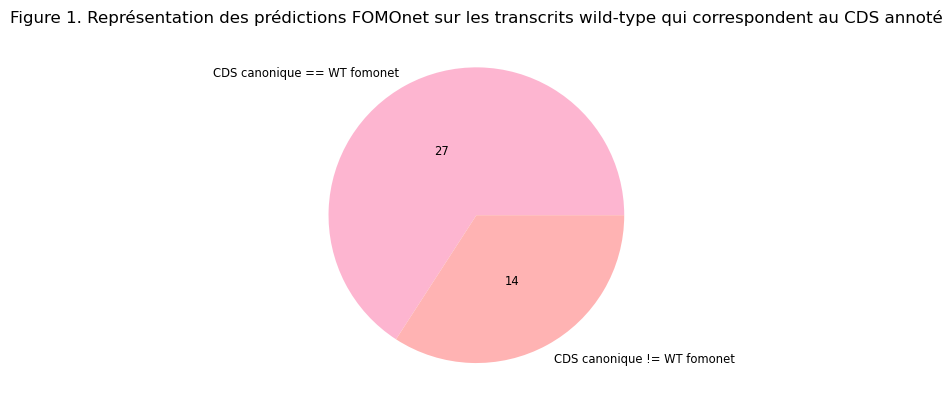

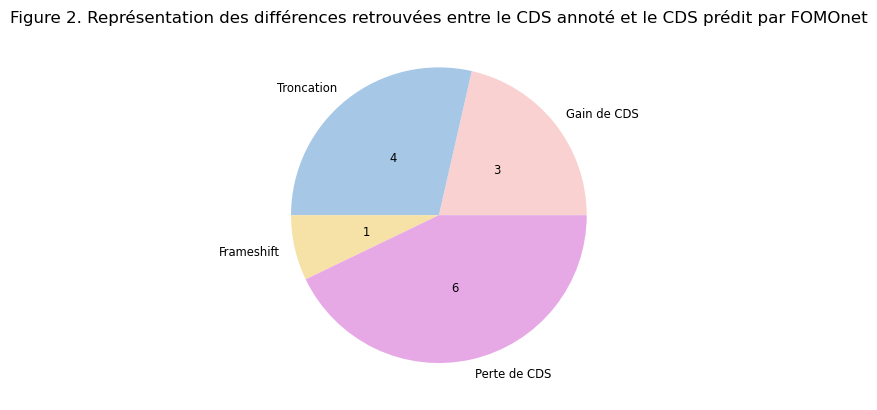

In [42]:
#### DÉBUT DE L'ANALYSE DES DONNÉES ####


# COMPARER CDS_CANONIQUE == FOMONET_WT ET CDS_CANONIQUE != FOMONET_WT
count_false = 0
count_pas_false = 0
for transcrit in gene_dic[gene]: # Itération sur chaque transcrit du gène
    cds_canonique = get_cds_canonique(transcrit)
    fomonet_wt = get_fomonet_wt(transcrit)
    if cds_canonique == fomonet_wt:
        count_false += 1
    else:
        count_pas_false += 1

import matplotlib.pyplot as plt # Importation du module
labels = 'CDS canonique == WT fomonet', 'CDS canonique != WT fomonet'
sizes = [count_false, count_pas_false]

def display_size(value):
    return f'{value}'

fig, ax = plt.subplots()
ax.pie(sizes, # Sélectionne les quantités
       labels=labels, # Sélectionne les noms des catégories
       autopct=lambda p: display_size(int(p * sum(sizes) / 100)), 
       colors=['#FDB5D0', '#FFB3B3'], # Défini les couleurs
       #hatch=['**O', 'oO', 'O.O', '.||.'], # Défini les motifs
       pctdistance=.5, # Choisi la position des pourcentage
       labeldistance=1.1, # Choisi la position des noms des catégories
       textprops={'size': 'smaller'}, radius=1.0) # Grosseur du graphique
# Ajouter un titre
plt.title("Figure 1. Représentation des prédictions FOMOnet sur les transcrits wild-type qui correspondent au CDS annoté")

# COMPARER LES DIFFÉRENTS CAS QUI CAUSENT UNE DIFFÉRENCE ENTRE LE CDS_CANONIQUE ET LE FOMONET_WT

count_gain_de_cds = 0
count_lost_cds = 0
count_elongation = 0
count_troncation = 0
count_inframe = 0
count_frameshift = 0

for transcrit in gene_dic[gene]:
    cds_canonique = get_cds_canonique(transcrit)
    fomonet_wt = get_fomonet_wt(transcrit)
    if cds_canonique != fomonet_wt:
        
        # Tous les transcrits dont CDS_canonique != fomonet_wt
        #print(transcrit + ' ' + str(cds_canonique) + ' ' + str(fomonet_wt))
        
        
        if len(cds_canonique) == 0:
            if len(fomonet_wt)>=1:
                count_gain_de_cds += 1
                
        elif len(cds_canonique) == 1:
            
            # FOMOnet ne prédit plus de CDS
            if len(fomonet_wt)==0:
                count_lost_cds += 1
                
            # FOMOnet prédit le même nombre de CDS
            elif len(fomonet_wt) == 1:
                for canonical in cds_canonique:
                    for predic in fomonet_wt:
                        
                        # Même début, différente fin
                        if canonical[0]==predic[0] and canonical[1]!=predic[1]:
                            if canonical[1]<predic[1]:
                                count_elongation += 1
                            elif canonical[1]>predic[1]:
                                count_troncation += 1
                        
                        # Même fin, différent début
                        elif canonical[1]==predic[1] and canonical[0]!=predic[0]:
                            if canonical[0]<predic[0]:
                                count_troncation += 1
                            elif canonical[0]>predic[0]:
                                count_elongation += 1
                        
                        # Aucune position en commun        
                        else:
                            if (predic[0]-canonical[0]) % 3 == 0 and (predic[1]-canonical[1]) % 3 == 0:
                                count_inframe += 1
                            else:
                                count_frameshift += 1
            
            # FOMOnet prédit plus de CDS que le CDS canonique
            elif len(fomonet_wt)>1:
                count_gain_de_cds += 1
                
                                
#print(count_gain_de_cds)
#print(count_troncation)
#print(count_elongation)
#print(count_frameshift)
#print(count_inframe)
#print(count_lost_cds)        
                            

labels = 'Gain de CDS', 'Troncation', 'Elongation', 'Frameshift', 'Inframe', 'Perte de CDS'
sizes = [count_gain_de_cds, count_troncation, count_elongation, count_frameshift, count_inframe, count_lost_cds]


sizes_filtered = [size for size in sizes if size > 0]
labels_filtered = [label for label, size in zip(labels, sizes) if size > 0]

def display_size(value):
    return f'{value}'

fig, ax = plt.subplots()
ax.pie(sizes_filtered, # Sélectionne les quantités
       labels=labels_filtered, # Sélectionne les noms des catégories
       colors=['#FAD1D1', '#A7C7E7', '#F6E1A7', '#E6A9E6', '#A8E4D0', '#FFD1B3'], # Défini les couleurs
       autopct=lambda p: display_size(int(p * sum(sizes_filtered) / 100)), 
       #hatch=['**O', 'oO', 'O.O', '.||.'], # Défini les motifs
       pctdistance=.5, # Choisi la position des pourcentage
       labeldistance=1.1, # Choisi la position des noms des catégories
       textprops={'size': 'smaller'}, radius=1.0) # Grosseur du graphique
# Ajouter un titre
plt.title("Figure 2. Représentation des différences retrouvées entre le CDS annoté et le CDS prédit par FOMOnet")             
                

Text(0.5, 1.0, 'Figure 4. Représentation des types de mutation lorsque la mutation crée un impact sur le CDS')

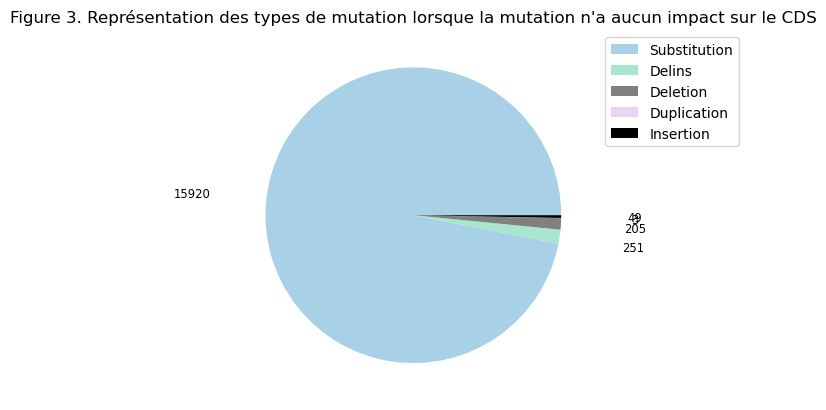

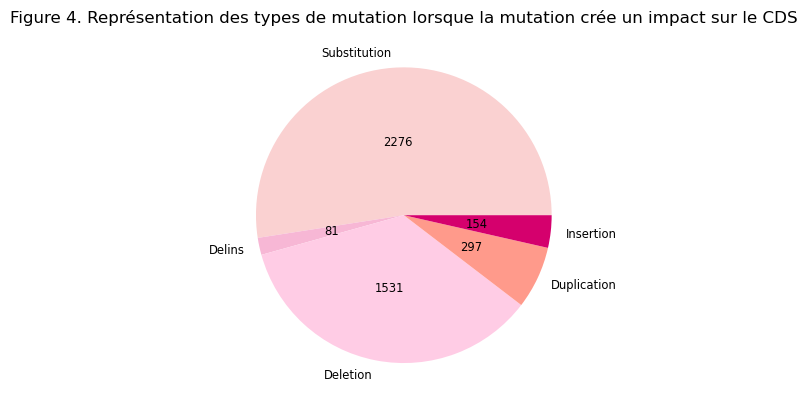

In [69]:
# ANALYSE DES MUTATIONS QUI DONNENT LE MÊME CDS AVANT ET APRÈS (CANONIQUE==FOMONET)


# TYPE DE MUTATION IMPLIQUÉ LORSQUE LA MUTATION N'A PAS D'IMPACT SUR LE CDS
count_substitution = 0
count_inversion = 0
count_insertion = 0
count_delins = 0
count_duplication = 0
count_deletion = 0
total = 0
with open(f'{gene}_analyse_fomonet.tsv', 'r') as file:
    for line in file:
        colonne = line.split('\t')
        if 'normal' in colonne[6] and 'False' in colonne[7]: # Même prédiction WT et annoté et la mutation ne change rien
            total +=1
            if 'Substitution' in colonne[4]:
                count_substitution += 1
            elif 'Inversion' in colonne[4]:
                count_inversion += 1
            elif 'Insertion' in colonne[4]:
                count_insertion += 1
            elif 'Duplication' in colonne[4]:
                count_duplication += 1
            elif 'Delins' in colonne[4]:
                count_delins += 1
            elif 'Deletion' in colonne[4]:
                count_deletion += 1
                           
#print(total)
#print(count_substitution)
#print(count_delins)
#print(count_deletion)
#print(count_duplication)
#print(count_insertion)
#print(count_inversion)

labels = 'Substitution', 'Delins', 'Deletion', 'Duplication', 'Insertion', 'Inversion'
sizes = [count_substitution, count_delins, count_deletion, count_duplication, count_insertion, count_inversion]


sizes_filtered = [size for size in sizes if size > 0]
labels_filtered = [label for label, size in zip(labels, sizes) if size > 0]

def display_size(value):
    return f'{value}'

fig, ax = plt.subplots()
ax.pie(sizes_filtered, # Sélectionne les quantités
       #labels=labels_filtered, # Sélectionne les noms des catégories
       colors=['#A8D0E6', '#A8E6CF', 'gray', '#E6D6F3', 'black', '#D3B0E0'], # Défini les couleurs
       autopct=lambda p: display_size(int(p * sum(sizes_filtered) / 100)), 
       #hatch=['**O', 'oO', 'O.O', '.||.'], # Défini les motifs
       pctdistance=1.5, # Choisi la position des pourcentage
       labeldistance=3.1, # Choisi la position des noms des catégories
       textprops={'size': 'smaller'}, radius=1.0) # Grosseur du graphique
# Ajouter un titre
plt.title("Figure 3. Représentation des types de mutation lorsque la mutation n'a aucun impact sur le CDS")
# Ajouter une légende      
plt.legend(labels_filtered, loc='upper left', bbox_to_anchor=(1, 1))


# TYPE DE MUTATION LORSQUE LA MUTATION A UN IMPACT SUR LE CDS
count_substitution = 0
count_inversion = 0
count_insertion = 0
count_delins = 0
count_duplication = 0
count_deletion = 0
total = 0
with open(f'{gene}_analyse_fomonet.tsv', 'r') as file:
    for line in file:
        colonne = line.split('\t')
        if 'normal' not in colonne[6] and 'False' in colonne[7]: # Même prédiction WT et annoté et la mutation ne change rien
            total +=1
            if 'Substitution' in colonne[4]:
                count_substitution += 1
            elif 'Inversion' in colonne[4]:
                count_inversion += 1
            elif 'Insertion' in colonne[4]:
                count_insertion += 1
            elif 'Duplication' in colonne[4]:
                count_duplication += 1
            elif 'Delins' in colonne[4]:
                count_delins += 1
            elif 'Deletion' in colonne[4]:
                count_deletion += 1
                
#print(total)
#print(count_substitution)
#print(count_delins)
#print(count_deletion)
#print(count_duplication)
#print(count_insertion)
#print(count_inversion)

labels = 'Substitution', 'Delins', 'Deletion', 'Duplication', 'Insertion', 'Inversion'
sizes = [count_substitution, count_delins, count_deletion, count_duplication, count_insertion, count_inversion]


sizes_filtered = [size for size in sizes if size > 0]
labels_filtered = [label for label, size in zip(labels, sizes) if size > 0]

def display_size(value):
    return f'{value}'

fig, ax = plt.subplots()
ax.pie(sizes_filtered, # Sélectionne les quantités
       labels=labels_filtered, # Sélectionne les noms des catégories
       colors=['#FAD1D1', '#F7B7D5', '#FFCCE5', '#FF9A8B', '#D5006D', '#F5C6D5'], # Défini les couleurs
       autopct=lambda p: display_size(int(p * sum(sizes_filtered) / 100)), 
       #hatch=['**O', 'oO', 'O.O', '.||.'], # Défini les motifs
       pctdistance=0.5, # Choisi la position des pourcentage
       labeldistance=1.1, # Choisi la position des noms des catégories
       textprops={'size': 'smaller'}, radius=1.0) # Grosseur du graphique
# Ajouter un titre
plt.title("Figure 4. Représentation des types de mutation lorsque la mutation crée un impact sur le CDS")
# Ajouter une légende      
#plt.legend(labels_filtered, loc='upper left', bbox_to_anchor=(1, 1))
        

Text(0.5, 1.0, "Figure 5. Déterminer l'impact des mutations dans le 3'UTR sur le CDS prédit")

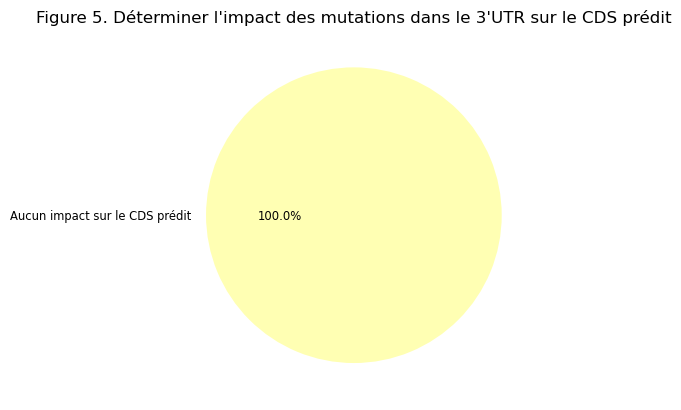

In [43]:
# ANALYSER LES MUTATIONS QUI SE TROUVENT DANS LE 3'UTR #

ne_change_rien = 0
changement = 0
with open('ENSG00000012048_analyse_fomonet.tsv', 'r') as file:
    for line in file:
        colonne = line.split('\t')
        
        # Je conserve les mutations situées dans le 3'UTR
        if '3_prime_UTR_variant' in colonne[5]:
            # Y'a-t-il un impact sur les transcrits quand la mutation tombe dans le 3'UTR?
            if colonne[7]== 'normal' or (colonne[7]== 'False' and colonne[6]== 'normal'):
                #print(line)
                ne_change_rien += 1
            else:
                #print(line)
                changement += 1

            
labels = 'Aucun impact sur le CDS prédit', 'Cause un changement dans le CDS prédit'
sizes = [ne_change_rien, changement]

# Je ne veux pas afficher les catégories avec 0 comme size
sizes_filtered = [size for size in sizes if size > 0]
labels_filtered = [label for label, size in zip(labels, sizes) if size > 0]

def display_size(value):
    return f'{value}'

fig, ax = plt.subplots()
ax.pie(sizes_filtered, # Sélectionne les quantités
       labels=labels_filtered, # Sélectionne les noms des catégories
       colors=['#FFFFB3', '#FFB3A7'], # Défini les couleurs
       autopct='%1.1f%%', 
       #hatch=['**O', 'oO', 'O.O', '.||.'], # Défini les motifs
       pctdistance=0.5, # Choisi la position des pourcentage
       labeldistance=1.1, # Choisi la position des noms des catégories
       textprops={'size': 'smaller'}, radius=1.0) # Grosseur du graphique
# Ajouter un titre
plt.title("Figure 5. Déterminer l'impact des mutations dans le 3'UTR sur le CDS prédit")
# Ajouter une légende      
#plt.legend(labels_filtered, loc='upper left', bbox_to_anchor=(1, 1))            

Text(0.5, 1.0, "Figure 6. Déterminer l'impact des mutations dans le 5'UTR sur le CDS prédit")

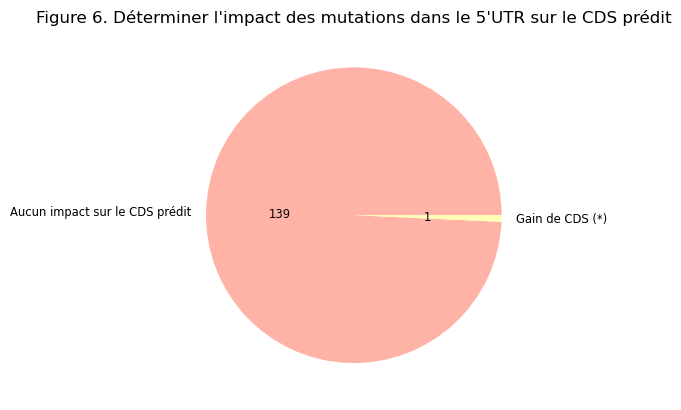

In [53]:
# ANALYSE DES MUTATIONS QUI TOMBENT DANS LE 5'UTR #

ne_change_rien = 0
changement = 0
with open('ENSG00000012048_analyse_fomonet.tsv', 'r') as file:
    for line in file:
        colonne = line.split('\t')
        
        # Je conserve les mutations situées dans le 3'UTR
        if '5_prime_UTR_variant' in colonne[5]:
            #print(line)
            # Y'a-t-il un impact sur les transcrits quand la mutation tombe dans le 5'UTR?
            if colonne[7]== 'normal' or (colonne[7]== 'False' and colonne[6]== 'normal'):
                #print(line)
                ne_change_rien += 1
            else:
                #print(line)
                changement += 1

labels = 'Aucun impact sur le CDS prédit', 'Gain de CDS (*)'
sizes = [ne_change_rien, changement]


sizes_filtered = [size for size in sizes if size > 0]
labels_filtered = [label for label, size in zip(labels, sizes) if size > 0]

def display_size(value):
    return f'{value}'

fig, ax = plt.subplots()
ax.pie(sizes_filtered, # Sélectionne les quantités
       labels=labels_filtered, # Sélectionne les noms des catégories
       colors=['#FFB3A7', '#FFFFB3'], # Défini les couleurs
       autopct=lambda p: display_size(int(p * sum(sizes_filtered) / 100)), 
       #hatch=['**O', 'oO', 'O.O', '.||.'], # Défini les motifs
       pctdistance=0.5, # Choisi la position des pourcentage
       labeldistance=1.1, # Choisi la position des noms des catégories
       textprops={'size': 'smaller'}, radius=1.0) # Grosseur du graphique
# Ajouter un titre
plt.title("Figure 6. Déterminer l'impact des mutations dans le 5'UTR sur le CDS prédit")
# Ajouter une légende      
#plt.legend(labels_filtered, loc='upper left', bbox_to_anchor=(1, 1))

Text(0.5, 1.0, 'Figure 7. Représentation des catégories de mutation qui cause une perte du CDS prédit')

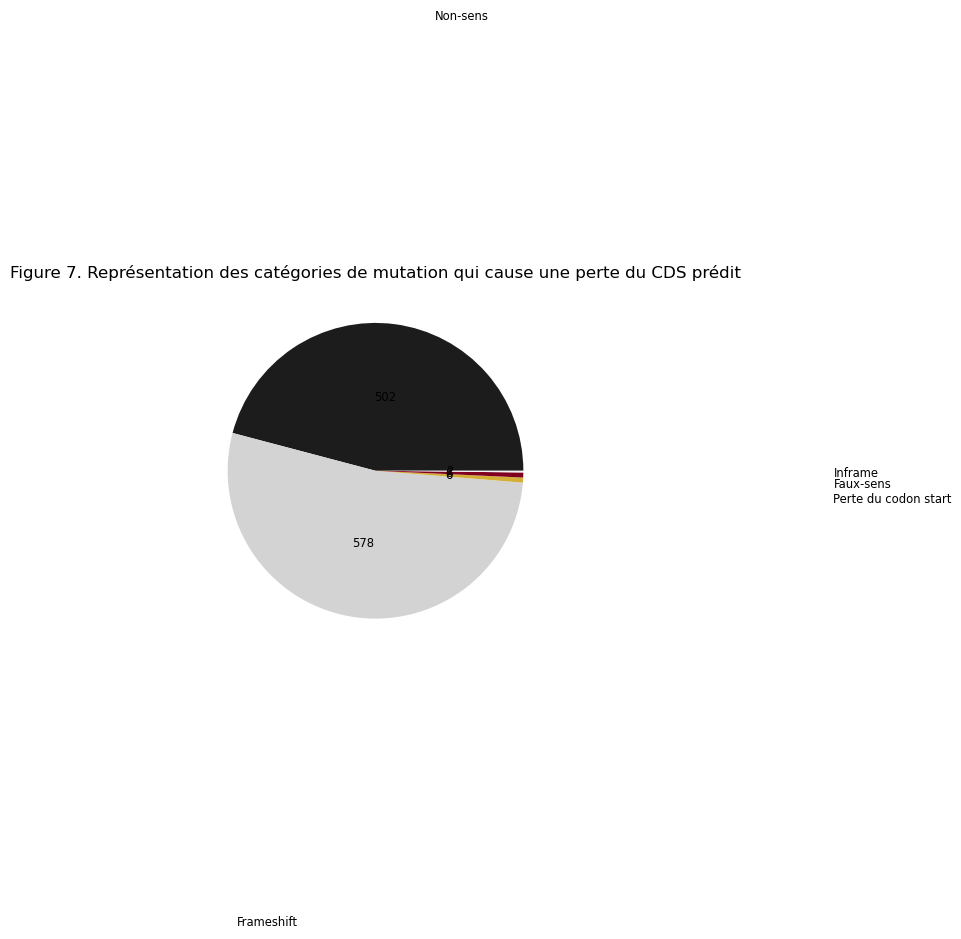

In [62]:
# ANALYSE DU POURQUOI IL A PERTE DE CDS APRÈS LA MUTATION #

stop_gain = 0
frameshift = 0
lost_start = 0
missense = 0
inframe = 0
other = 0
with open('ENSG00000012048_analyse_fomonet.tsv', 'r') as file:
    for line in file:
        colonne = line.split('\t')
        
        # Je conserve les mutations situées dans le 3'UTR
        if 'loss of CDS' in colonne[6] and 'False' in colonne[7]:
            
            # Je vais répartir selon la catégorie de mutation
            if 'stop_gained' in colonne[5]:
                stop_gain += 1
            elif 'frameshift_variant' in colonne[5]:
                frameshift += 1
            elif 'start_lost' in colonne[5]:
                lost_start += 1
            elif 'missense_variant' in colonne[5]:
                missense += 1
            elif 'inframe_deletion' in colonne[5] or 'inframe_insertion':
                inframe += 1
            else:
                other += 1
                
                
labels = 'Non-sens', 'Frameshift', 'Perte du codon start', 'Faux-sens', 'Inframe', 'Autre cas'
sizes = [stop_gain, frameshift, lost_start, missense, inframe, other]


sizes_filtered = [size for size in sizes if size > 0]
labels_filtered = [label for label, size in zip(labels, sizes) if size > 0]

def display_size(value):
    return f'{value}'

fig, ax = plt.subplots()
ax.pie(sizes_filtered, # Sélectionne les quantités
       labels=labels_filtered, # Sélectionne les noms des catégories
       colors=['#1C1C1C', '#D3D3D3', '#D4AF37', '#800020', '#F4F4F4', '#2A3D66'], # Défini les couleurs
       autopct=lambda p: display_size(int(p * sum(sizes_filtered) / 100)), 
       #hatch=['**O', 'oO', 'O.O', '.||.'], # Défini les motifs
       pctdistance=0.5, # Choisi la position des pourcentage
       labeldistance=3.1, # Choisi la position des noms des catégories
       textprops={'size': 'smaller'}, radius=1.0) # Grosseur du graphique
# Ajouter un titre
plt.title("Figure 7. Représentation des catégories de mutation qui cause une perte du CDS prédit")
# Ajouter une légende      
#plt.legend(labels_filtered, loc='upper left', bbox_to_anchor=(1, 1))            
            
            
            